# **ACSE Module 8 - Afternoon 1 Practical**

# Regression, k-means and PCA

***

## Challenges

1. Incorporate categorical features in your regression model. Does this improve your predictions?
2. Take reasonable steps to mitigate [multicolinearity](https://en.wikipedia.org/wiki/Multicollinearity#Definition).
3. Check whether we have met each of the 4 assumptions behind linear regression.
4. If we have not met some of these assumption, is there anything (preferably something simple) that we can do to make sure we do satisfy them? If so, try to implement it.
5. How do you know that you have the correct hyperparemeter k when using k-means? Try using the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).




## Imports

In [ ]:
%pylab inline
import pandas as pd # for manipulating tabular data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality

Populating the interactive namespace from numpy and matplotlib


# 1. Linear regression

I know that you’ve always dreamed of dominating the housing market. Until now, that was impossible. But with this limited offer you can… got a bit sidetracked there.

We will work with the housing prices dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) which was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. The meanings of the columns are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

## 1.1 Imports

In [ ]:
from sklearn.linear_model import LinearRegression # implementation of linear regression
from sklearn.model_selection import train_test_split # for creating a train and test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating our model

## 1.2 Loading the data

In [ ]:
# download the data
!wget https://raw.githubusercontent.com/acse-2020/ACSE-8/main/implementation/practical_1/morning_lecture/Houseprices.csv?token=ABNZJP5IAN37ENU4WBELAV3ASDFJY

--2021-04-25 12:26:29--  https://raw.githubusercontent.com/acse-2019/ACSE-8/master/Implementation/practical_1/morning/Houseprices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘Houseprices.csv.7’

Houseprices.csv.7   100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2021-04-25 12:26:30 (9.85 MB/s) - ‘Houseprices.csv.7’ saved [460676/460676]



In [ ]:
# read the data from the csv file into a pandas dataframe 
houses = pd.read_csv('./Houseprices.csv')

In [ ]:
# view the first 5 rows of the dataset along with the columns names
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.3 Dimensions and features

In [ ]:
# number of rows and columns in houses
houses.shape

(1460, 81)

In [ ]:
# column names 
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Reminder: The meanings of these features are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

## 1.4 Data types

In [ ]:
# info provides an overview of the data-type and number of real data-points present for each column
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### One-hot encoding

Some of these data types are clearly categorical. In order to use categorical features in ML models we would have to [one-hot encode them](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). This is easy enough to do using the `pd.get_dummies()` function. For more information, [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#) is the documentation. For now, we will simply deal with the numerical features.

In [ ]:
# for now we are only going to consider numerical data-types 
houses_num = houses.select_dtypes(include = 'number')
houses_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

## 1.5 How many missing values do we have in each column?

In [ ]:
# .isna() is used to calculate whether the values in houses are NaN or not
# .sum() is then used to calculate how many NaN values are present in each column
# .sort_values(ascending=False) is then used to order the columns according to how many missing values are present
missing = houses.isna().sum().sort_values(ascending=False)
missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [ ]:
# check the data-types of the features containing missing values
houses[missing.index[:19]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

### Data imputation

It may be worth taking the time to deal with missing values so as to best squeeze as much information as we can from the dataset. However, the columns with a significant number of missing values (> 40%) are probably not worth considering and it would be wise to avoid using these features in our regression model.

For the other features there are a number of strategies we could take to replace missing values with a sensible estimate. For a numerical feature, the most simple of these strategies could be to replace missing values with the median value for that feature. For instance, we could run the following line of code to impute the missing values in the 'MasVnrArea' feature:

    houses['MasVnrArea'].fillna(houses['MasVnrArea'].median(), inplace=True)

 If you are dealing with a categorical feature, you could replace missing values with the mode instead.

In [ ]:
# how many missing values do we have from purely numerical features
houses_num.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
dtype: int64

In [ ]:
# in the interest of time we will simply drop the LotFrontage column
houses_num = houses_num.drop('LotFrontage', axis=1)

# we will then drop all rows containing the remaining missing values 
houses_num = houses_num.dropna()

In [ ]:
houses_num.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## 1.6 Visualisation

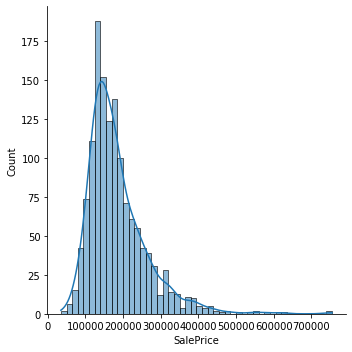

In [ ]:
# distribution of target variable
sns.displot(houses_num['SalePrice'], kde=True)

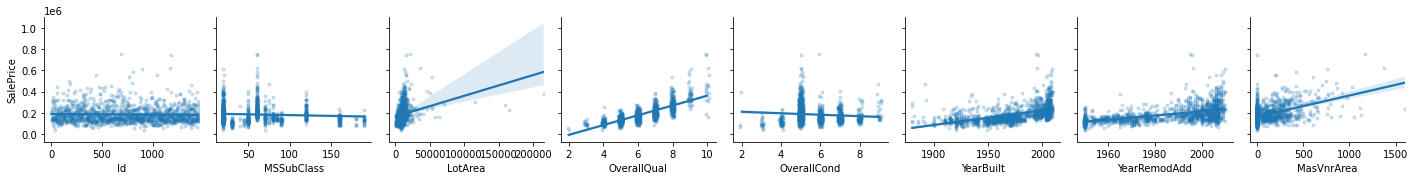

In [ ]:
# visualise the relationship between different features and the target variable
sns.pairplot(houses_num, x_vars=houses_num.columns.drop('SalePrice')[:8], y_vars=['SalePrice'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

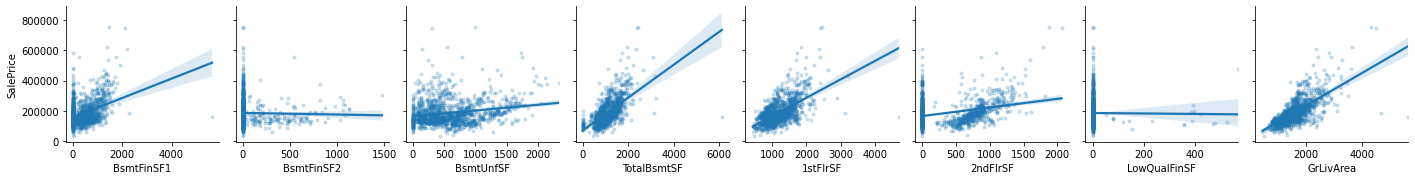

In [ ]:
# visualise the relationship between different features and the target variable
sns.pairplot(houses_num, x_vars=houses_num.columns.drop('SalePrice')[8:16], y_vars=['SalePrice'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

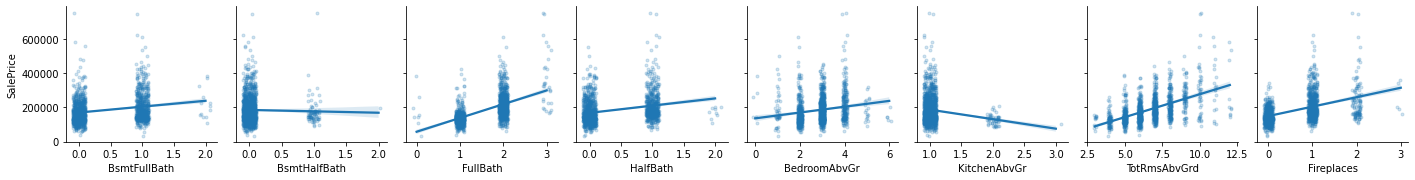

In [ ]:
# visualise the relationship between different features and the target variable
sns.pairplot(houses_num, x_vars=houses_num.columns.drop('SalePrice')[16:24], y_vars=['SalePrice'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

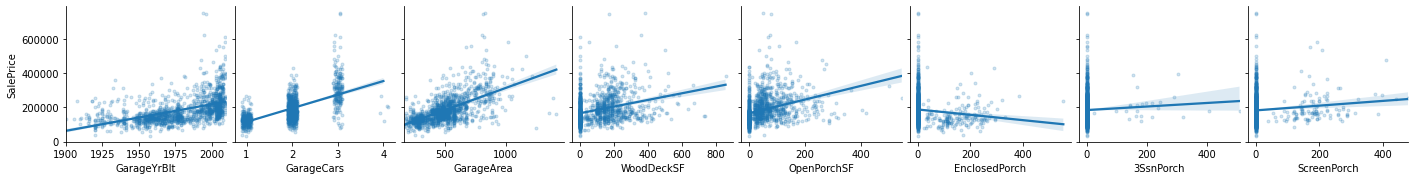

In [ ]:
# visualise the relationship between different features and the target variable
sns.pairplot(houses_num, x_vars=houses_num.columns.drop('SalePrice')[24:32], y_vars=['SalePrice'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

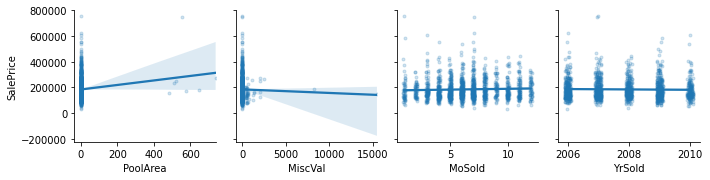

In [ ]:
# visualise the relationship between different features and the target variable
sns.pairplot(houses_num, x_vars=houses_num.columns.drop('SalePrice')[32:], y_vars=['SalePrice'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

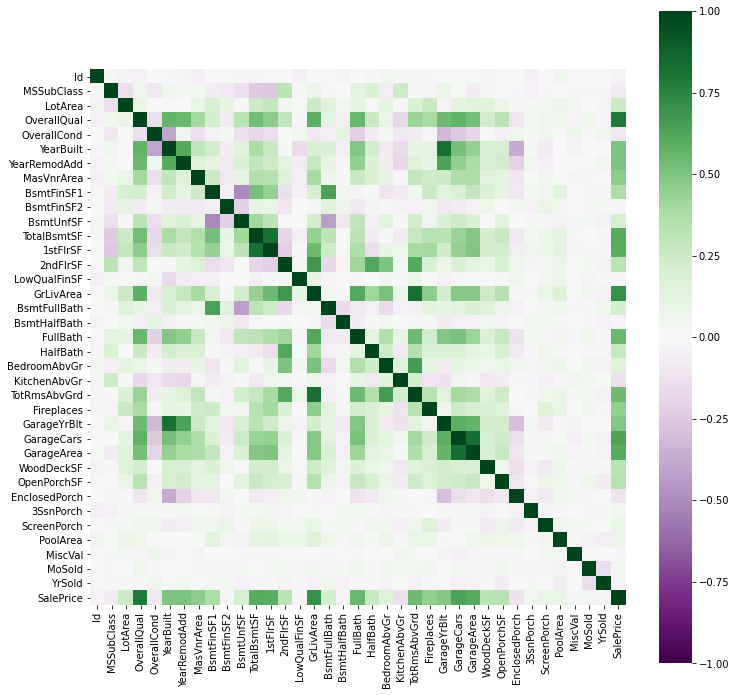

In [ ]:
# visualise correlation coefficients
plt.figure(figsize=(12, 12))
sns.heatmap(houses_num.corr(), square=True, cmap='PRGn', vmin=-1, vmax=1)

### Multicolinearity

If you are using regression for inference rather than as a predictive tool, it is important to check for [muilticolinearity](https://en.wikipedia.org/wiki/Multicollinearity#Definition). This is when your features are highly correlated with one-another (i.e. the magnitude of the correlation coefficient between them is 0.6 or more). It can cause the regression problem to become ill-conditioned, where coefficients/parameters change dramatically in response to small changes in the data. In practice, this results in incorrect and misleading coefficients/parameters. More on inference later on.

## 1.7 Select features

In [ ]:
# correlation with the target variable
houses_num.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.786212
GrLivArea        0.709795
GarageCars       0.636118
GarageArea       0.607210
TotalBsmtSF      0.602981
1stFlrSF         0.595994
FullBath         0.558644
TotRmsAbvGrd     0.541117
YearBuilt        0.507696
YearRemodAdd     0.505673
GarageYrBlt      0.486220
MasVnrArea       0.468083
Fireplaces       0.450939
BsmtFinSF1       0.373079
OpenPorchSF      0.328475
2ndFlrSF         0.316852
WoodDeckSF       0.312760
HalfBath         0.268587
LotArea          0.253793
BsmtFullBath     0.223919
BsmtUnfSF        0.214471
BedroomAbvGr     0.168646
KitchenAbvGr     0.137434
EnclosedPorch    0.120320
ScreenPorch      0.101012
OverallCond      0.093886
PoolArea         0.092231
MSSubClass       0.076177
MoSold           0.042432
3SsnPorch        0.039871
Id               0.031212
BsmtHalfBath     0.024846
YrSold           0.023784
BsmtFinSF2       0.022252
MiscVal          0.017697
LowQualFinSF     0.008015
Name: SalePrice, dtype: float64

In [ ]:
# select the 9 most highly correlated features with the target variable to be our features
X = houses_num[houses_num.corr()['SalePrice'].abs().sort_values(ascending=False)[1:10].index.to_list()]

# select our target variable
y = houses_num["SalePrice"]

## 1.8 Train/test split

In [ ]:
# perform the train/test split with random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Check the shapes
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1096, 9)
y_train: (1096,)
X_test: (275, 9)
y_test: (275,)


## 1.9 Creating our model

In [ ]:
# instantiate model class object
model = LinearRegression()

# fit model to the training set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 1.10 Evaluation

In order to evaluate how effective our model is for predictive modelling we need to see how well it performs on unseen data; the test set!

In [ ]:
# use our model to generate predictions for the test set
preds_test = model.predict(X_test)

In [ ]:
# evaluate how good these predictions are using mae and rmse
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 24644.69821511632
RMSE: 35959.27178212465


Here we have used both the mean absolute error and the root mean squared error. The mean absolute error is more robust to outliers than the root mean squared error as it doesn't involve squaring your residuals. However, using the root mean squared error may be preferable if you want to make sure that your models have taken outliers into account. You can read more about these error metrics [here](https://www.dataquest.io/blog/understanding-regression-error-metrics/).

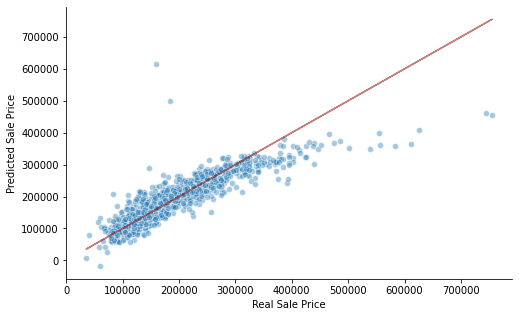

In [ ]:
# evaluation can also be done visually by plotting predictions vs the true target
# across the entire dataset
preds = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(y, preds, alpha=0.4, linewidths=1, edgecolors='white')
plt.plot(y, y, color='darkred', alpha=0.5)
plt.xlabel('Real Sale Price')
plt.ylabel('Predicted Sale Price')
sns.despine()

From the above plot we can see that, for higher sale prices (>400,000), our model is consistently underestimating the true sale price.



---



## **Challenge 1**

Incorporate categorical features in your regression model. Does this improve your predictions?



---




## 1.11 Inference 

So far we have been using linear regression purely as a predictive tool. However, one of the main advantageous of linear regression is that it is incredibely useful for inference. This is where we use our model to try and understand how the target variable was generated from our features, rather than just predicting it. You can read more about the differences between prediction and inference [here](https://www.datascienceblog.net/post/commentary/inference-vs-prediction/).

The reason linear regression is great for inference is that we can easily interpret the meaning of the parameters/coefficients of our model. 

In [ ]:
# instantiate model class object
model = LinearRegression()

# when using regression for inference you should fit your model to the entire dataset
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# make predictions across the entire dataset
preds = model.predict(X)

In [ ]:
# when using regression for inference it is more common to use the R-squared metric for evaluation 
# this is also typically done on the whole dataset (rather than a separate test set)
# it is a measure of how much variance in the target variable our model is able to explain 
r2 = r2_score(y, preds)
r2

0.764901178015206

In [ ]:
# lets have a look at our models parameters or coefficients
params = pd.DataFrame({'Features': X.columns, 'Coefficients': model.coef_})
params

,Features,Coefficients
0,OverallQual,21829.100623
1,GrLivArea,51.609355
2,GarageCars,13739.735885
3,GarageArea,16.770725
4,TotalBsmtSF,18.674984
5,1stFlrSF,13.382909
6,FullBath,-7479.853184
7,TotRmsAbvGrd,276.141941
8,YearBuilt,328.349101


From this table we could deduce that, for a unit increase in the `OverallQual` feature, we would expect an increase of $23057 in the target variable `SalePrice`. 

However, you may have noticed that the variables `GarageCars` and `GarageArea` are essentially two different measures of the same thing and are therefore highly correlated with each other. This means that our model will be unable to find reliable estimates for their corresponding coefficients due to [multicolinearity](https://en.wikipedia.org/wiki/Multicollinearity). To mitigate multicolinearity we could simply remove one of these features, or perhaps they could be combined into a new feature. It is likely that some of the other features we are using also exhibit multicolinearity and this should be explored further or we will be unable to trust these coefficients/parameters.

It is also worth noting that, when using regression for inference, the [statsmodels library](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) is generally prefered to sklearn as it readily provides statistical tests on your model parameters/coefficients. This is really useful as it allows us to see if all of our features are actually adding something valueble to our model. 



---


## **Challenge 2**

Take reasonable steps to mitigate multicolinearity.



---

## 1.12 Assumptions behind linear regression

When using regression for predictive modelling, most practitioners don't worry too much about the assumptions behind linear regression as long as the performance on the test set is satisfactory. From my experience it is still a good idea to check them as they may inform us on what we can do to get even better predictions. 

However, if you are using regression for inference purposes, it is absolutely crucial to validate these assumptions or you may end up with incorrect and misleading interpretations. The 4 main assumptions are as follows: 

1.   **Linear relationship**: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
2.   **Independence**: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.
3.   **Homoscedasticity**: The residuals have constant variance at every level of x.
4.   **Normality**: The residuals are normally distributed.

For more information, as well as a discussion on what to do if your model does not meet these assumptions, please checkout [this](https://www.statology.org/linear-regression-assumptions/) article.



---


## **Challenge 3**

Check whether we have met each of the 4 assumptions behind linear regression.

## **Challenge 4**

If we have not met some of these assumption, is there anything (preferably something simple) that we can do to make sure we do satisfy them? If so, try to implement it.



---



# 2. K-Means

Let us now turn our attention to clustering and see what can be gained by applying the K-Means algorithm to this dataset.

## 2.1 Imports

In [ ]:
# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import scale

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

# to provide an implementation of PCA for reducing the dimensionality of our data
from sklearn.decomposition import PCA

## 2.2 Define and fit the k-means model

In [ ]:
# create a KMeans class object and choose the number of clusters k
KMeans_model = KMeans(n_clusters = 6, random_state = 123)

# fit the model to our scaled features
KMeans_model.fit(scale(X_train))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)



---



## **Challenge 5**

How do you know that you have the correct hyperparemeter k when using k-means? Try using the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).



---

In [ ]:
# add our cluster labels as a new column to our original training set features
X_train['cluster'] = KMeans_model.labels_
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,cluster
157,8,1968,3,680,774,774,2,8,2009,1
146,5,875,1,180,715,875,1,5,1931,4
811,6,848,2,420,848,848,1,4,2004,0
192,7,1431,2,666,1431,1431,2,6,1999,5
139,6,1764,2,470,928,928,2,7,1997,1


## 2.3 PCA for visualizing our clusters

One of the main challenges of clustering in high dimensional spaces is how we actually visualize our clusters. PCA allows us to reduce this 9-dimensional space down to just 2 dimensions. This allows us to easily view and inspect our clusters in a simple 2D scatter plot.

In [ ]:
# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# fit our pca object to the scaled data
X_train_pca = pca.fit_transform(scale(X_train.drop('cluster', axis=1)))

# explained variance is the fraction of the total variance in the entire dataset that a principal component accounts for
pca.explained_variance_ratio_

array([0.54367919, 0.13317322])

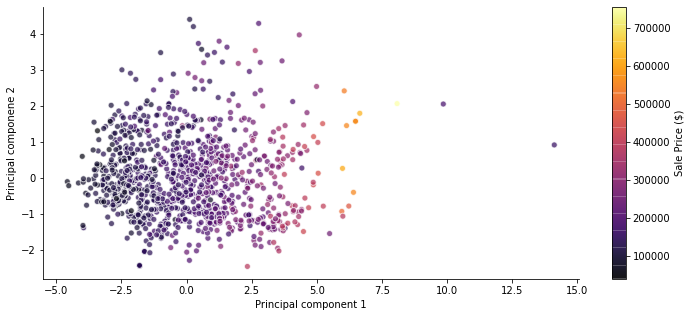

In [ ]:
# lets visualize our data in our reduced 2-dimensional space
plt.figure  (figsize=(12, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.7, linewidths=1, 
            edgecolors='white', cmap='inferno')
plt.xlabel('Principal component 1')
plt.ylabel('Principal componene 2')
sns.despine()
plt.colorbar(label='Sale Price ($)')
plt.show()

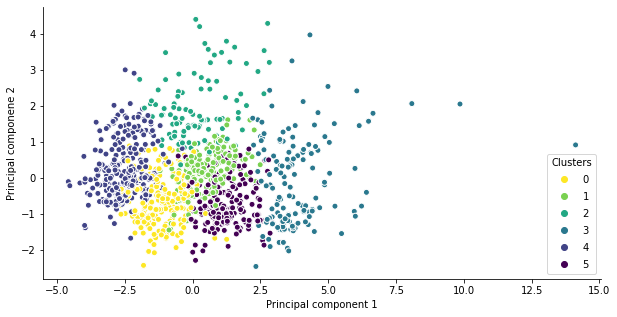

In [ ]:
# lets visualize our data in our reduced 2-dimensional space
plt.figure(figsize=(10, 5))
plot = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train['cluster'], linewidths=1,
                   edgecolors='white', cmap='viridis_r')
plt.xlabel('Principal component 1')
plt.ylabel('Principal componene 2')
plt.legend(*plot.legend_elements(), loc="lower right", title="Clusters")
sns.despine()
plt.show()

In [ ]:
# let's have a look at the coordinates in feature space of our 2 pca components
pca.components_

array([[ 0.35973525,  0.36036807,  0.36106614,  0.35125966,  0.3229093 ,
         0.33175604,  0.3282474 ,  0.30028014,  0.27336112],
       [-0.1126813 ,  0.47350703, -0.1962913 , -0.21195908, -0.23049167,
        -0.05131789,  0.16681533,  0.60710096, -0.47694677]])

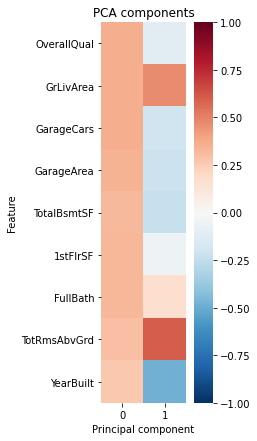

In [ ]:
# it's often easier to visualize these components as a heatmap
plt.figure(figsize=(3,7))
sns.heatmap(pd.DataFrame(pca.components_,columns=X_train.drop('cluster', axis=1).columns).transpose(), 
            cmap='RdBu_r', vmin=-1, vmax=1, square=True)
plt.xlabel('Principal component')
plt.ylabel('Feature')
plt.title('PCA components')
plt.show()

From the above plots we can hypothesize that the first principal component is correlated with `SalePrice` and the second principal component seems to be correlated with general comfort and also the year built (it will be high if it's an old house). Using this information we could now attempt to interpret our clusters in our reduced 2 dimensional space. 

## 2.4 Enhancing our original regression model

Ok, so we have created some clusters, applied PCA to visualize them and then thought a little about interpretation... So what? Well, we could now try to use this new insight (clusters) we have mined from our data in order to enhance our linear regressions predictive performance.

In [ ]:
# we need to one-hot encode the cluster feature as it is a purely categorical feature
X_train = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)

In [ ]:
# instantiate model class object
model2 = LinearRegression()

# fit model to the training set
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# in order to evaluate we must first apply the same steps to our test set as we did for our train set
# let's first predict clusters for each of the data points and add this as a new feature
X_test['cluster'] = KMeans_model.predict(scale(X_test))

# now let's one-hot encode the new cluster feature 
X_test = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# use our enhanced model to generate predictions for the test set
preds_test = model2.predict(X_test)

In [ ]:
# evaluate how good these predictions are using mae and rmse
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 22315.20597066806
RMSE: 33302.50876455495


This is a substantial improvement on our previous model. It seems that using K-means as a pre-processing step can sometimes be an effective strategy when building predictive models! 

# 3. Logistic regression

We will now take a look at logistic regression for the binary classification problem of predicting with a tumour is malignant or benign. 

## 3.1 Imports

In [ ]:
# to provide an implementation of logistic regression
from sklearn.linear_model import LogisticRegression

# to provide an implementation of the accuracy metric
from sklearn.metrics import accuracy_score

# import dataset loader
from sklearn.datasets import load_breast_cancer

## 3.2 Loading the data

In [ ]:
# load dataset
data = load_breast_cancer()

In [ ]:
# convert features to a pandas dataframe
X = pd.DataFrame(data['data'],columns=data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# target variable categories 
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# convert target to a pandas series
y = pd.Series(data.target, name='target')

## 3.3 Pre-processing the data

In [ ]:
# check the data balance
y.value_counts()

1    357
0    212
Name: target, dtype: int64

### Imbalanced data

Checking that your target variable is balanced is really important. If it is not balanced, accuracy could potentially be a misleading metric to use when it comes to evaluating your model. For instance, if only 2% of your data was malignant and 98% of your data was benign, you could achieve 98% accuracy simply by predicting benign every time, regardless of what your features are telling you! 

Potentially solutions include the use of additional metrics such as [precision, recall](https://en.wikipedia.org/wiki/Precision_and_recall) and the [f1-score](https://en.wikipedia.org/wiki/F-score), as well as resampling your data to counteract the imbalance.

In [ ]:
# dimensions of the dataframe
X.shape

(569, 30)

In [ ]:
# look for missing values and check data-types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# perform the train/test split with random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

## 3.4 Finding the top predictors

In [ ]:
# loop over all features, creating a logistic regression classifier using one feature each time
a = []
for i in range(X_train.shape[1]): 

    # create an instance of the classifier
    clf = LogisticRegression()

    # fit the data to the classifier, i.e train the logistic regression classifier 
    clf.fit(X_train[X_train.columns[i]].to_numpy().reshape(-1, 1), y_train) 

    # using the classifier, predict the class for the given X
    y_pred = clf.predict(X_train[X_train.columns[i]].to_numpy().reshape(-1, 1))

    # accuracy score gives proportion of the predicted class (y_pred) that match the actual class (y)
    a.append(accuracy_score(y_train, y_pred)) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


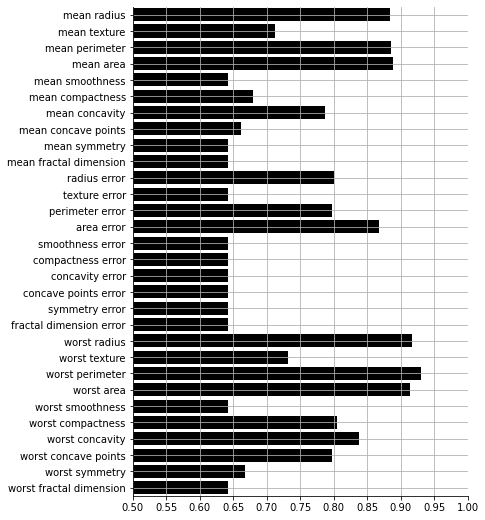

In [ ]:
# visualize accuracy vs feature used for classification
plt.figure(figsize(6,9))
sns.barplot(a, X_train.columns, color='black')
plt.xticks(np.arange(0,1.05,0.05))
plt.xlim(0.5,1)
plt.grid()
sns.despine()

So it would appear that `worst radius` and `worst area` yield the best accuracy classifiers and are perhaps the best predictors.

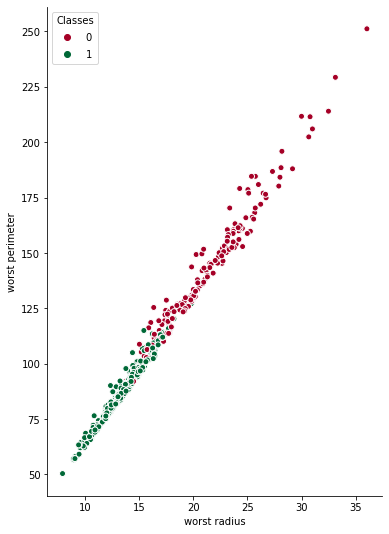

In [ ]:
# visualize worst radius vs worst area with color as the target
plot = plt.scatter(X_train['worst radius'], X_train['worst perimeter'], c=y_train,
                   linewidths=1, edgecolors='white', cmap='RdYlGn')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('worst radius')
plt.ylabel('worst perimeter')
sns.despine()

The data looks very easily seperable along these dimensions. If only we could draw a horizontal line across the middle of this plot, we could guess that everything above the line is class 0 and everything below is class 1. This is what Logistic Regression does. Note that if we did want to use logistic regression for inference on these features we would likely run into difficulties as they are extremely colinear ([multicolinearity](https://en.wikipedia.org/wiki/Multicollinearity)).

## 3.5 Creating our model

In [ ]:
# create new X variables containing only these two features
X_train_reduced = X_train[['worst radius', 'worst perimeter']]
X_test_reduced = X_test[['worst radius', 'worst perimeter']]

In [ ]:
# create an instance of the logistic regressor
clf1 = LogisticRegression()

# train the logistic regressor using a scaled version of X_train
clf1.fit(X_train_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3.6 Evaluation

In [ ]:
# generate predictions on the test set
preds_test = clf1.predict(X_test_reduced)

# print out the accuracy of our classifier on the test set
accuracy_score(y_test, preds_test)

0.8771929824561403

## 3.7 Visualise the decision boundary

A bit of background on deriving and plotting the decision boundary for logistic regression can be found [here](https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/).

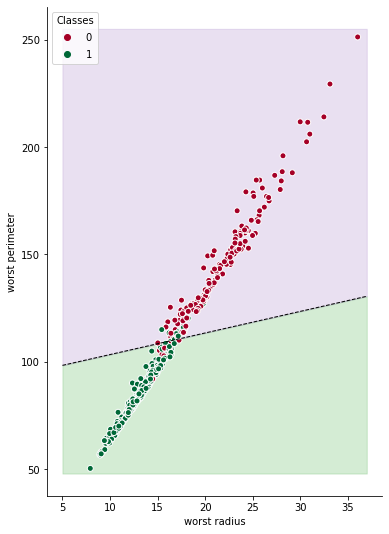

In [ ]:
# obtain model parameters/coefficients
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T

# solve for the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# visualise the decision boundary
xmin, xmax = 5, 37
ymin, ymax = 48, 255
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:green', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:purple', alpha=0.2)
plot = plt.scatter(X_train['worst radius'], X_train['worst perimeter'], c=y_train,
                   linewidths=1, edgecolors='white', cmap='RdYlGn')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('worst radius')
plt.ylabel('worst perimeter')
sns.despine()

## 3.8 Can PCA do any better?

Rather than selecting our two most powerful predictive features, we could also try to use all 30 features but create a two-component PCA projection of them. Then we can create a logistic classifier that will use these two components as features.

In [ ]:
# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# fit our pca object to the scaled data
X_train_pca = pca.fit_transform(scale(X_train))

# explained variance is the fraction of the total variance in the entire dataset that a principal component accounts for
pca.explained_variance_ratio_

array([0.45094822, 0.18249191])

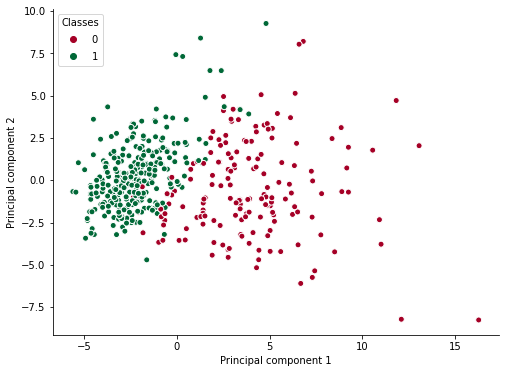

In [ ]:
# visualize PC1 vs PC2 with color as the target
plt.figure(figsize=(8,6))
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train,
                   linewidths=1, edgecolors='white', cmap='RdYlGn')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
sns.despine()

In [ ]:
# create new logistic regression classifier 
clf2 = LogisticRegression()

# train the logistic regressor using a scaled version of X_train
clf2.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# evaluate by first projecting test set onto our principal components
X_test_pca = pca.transform(scale(X_test))

# generate predictions on the test set
preds_test = clf2.predict(X_test_pca)

# print out the accuracy of our classifier on the test set
accuracy_score(y_test, preds_test)

0.8947368421052632

Yes, it would seem that applying logistic regression on our reduced version of all 30 features achieves slightly better performance than simply selecting the two most powerful features! 

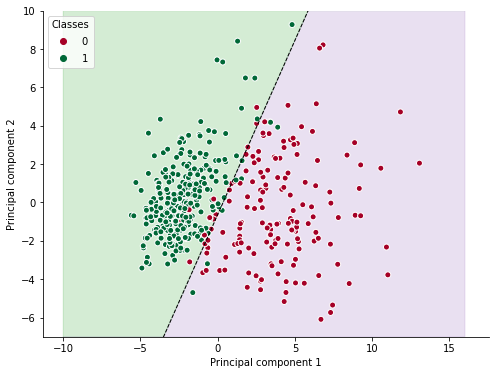

In [ ]:
# obtain model parameters/coefficients
b = clf2.intercept_[0]
w1, w2 = clf2.coef_.T

# solve for the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# visualise the decision boundary
xmin, xmax = -10, 16
ymin, ymax = -7, 10
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.figure(figsize=(8,6))
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:purple', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train,
                   linewidths=1, edgecolors='white', cmap='RdYlGn')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.ylim(-7,10)
sns.despine()